#### K-means  : 비지도 학습 - clustering - 차원축소(dimentionality reduction):주성분분석(PCA)
#### 데이터간 유사도(거리) 측정 방법 : 유클리드 거리, 맨해튼 거리, 민코프스키 거리, 코사인 유사도 등...

In [1]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# 한글 폰트 설정
import matplotlib.font_manager as fm
# 한글 폰트 설정
# font_path = "/System/Library/AssetsV2/com_apple_MobileAsset_Font7/f879347736afb6e4e0880bcede9df92492c0f040.asset/AssetData/Gungseouche.ttf"
font_path="/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False




#### sales data.csv => 범주형과 수치형이  함께 있는 데이터
#### 1) Channel: 고객 채널(호텔/레스토랑), 또는 소매 채널(명목형 데이터): 1,2,
#### 2) Region : 고객 지역(명목형 데이터): 1,2,3,
#### 3) Fresh  : 신선한 제품에 대한 연간 지출(연속형 데이터)
#### 4) Milk   : 유제품에 대한 연간 지출(연속형 데이터)
#### 5) Grecery: 식료품에 대한 연간 지출(연속형 데이터)
#### 6) Frozen : 냉동 제품에 대한 연간 지출(연속형 데이터)
#### 7) Detergents_Paper : 세제 및 종이 제품에대한 연간 지출(연속형 데이터)
#### 8) Delicassen : 조제 식품에 대한 연간 지출(연속형 데이터)

In [2]:
# 데이터 불러오기
# from google.colab import files
# file_uploaded=files.upload()

data = pd.read_csv('../data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
print(data.Region.value_counts())
print(data.Channel.value_counts())
print(data.shape)


Region
3    316
1     77
2     47
Name: count, dtype: int64
Channel
1    298
2    142
Name: count, dtype: int64
(440, 8)


In [4]:
import pandas as pd

# 'Region'과 'Channel' 열만 원핫 인코딩
# 원래 인코딩할 때 범주가 2개라면 1개로, 3개라면 2개 열로 인코딩하는 것이 맞다. 
encoded_data = pd.get_dummies(data, columns=['Region', 'Channel'], drop_first=True)

print(encoded_data.shape)  # 인코딩 후 데이터의 shape 확인
encoded_data.head()


(440, 9)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
0,12669,9656,7561,214,2674,1338,False,True,True
1,7057,9810,9568,1762,3293,1776,False,True,True
2,6353,8808,7684,2405,3516,7844,False,True,True
3,13265,1196,4221,6404,507,1788,False,True,False
4,22615,5410,7198,3915,1777,5185,False,True,True


In [5]:
encoded_data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Region_2', 'Region_3', 'Channel_2'],
      dtype='object')

## 클러스터링 시 중요한 점 
1. 전처리
- 이상치 관리
- 거리 기반으로 클러스터링을 하기 때문에 스케일을 맞춰줘야 한다. 
- feature 간의 상관관계가 있으면 클러스터링할 때 의도하지 않은 가중치가 들어가기 때문에 차원 축소 및 feature selection을 통해 이를 해결해야 한다. 
2. 모델링 
- 클러스터링에 사용할 수 있는 모델은 다양하다. 
- kmenas 
- 계층적 군집화
- dbscan 
- gmm 
- Spectral Clustering
3. 평가 
- 실루엣 점수 
- 엘보우 메소드 
- Davies-Bouldin Index :클러스터 내의 밀도와 클러스터 간의 거리 비율을 계산하여 클러스터링의 성능을 평가.
- Dunn Index : 클러스터 간의 거리와 클러스터 내의 거리의 비율을 계산하여 군집을 평가.
- 직접 2차원으로 확인 
4. 시각화 
- umap, t-sne를 활용하여 군집화가 잘 되었는지 항상 확인하는 것이 중요하다. 

## 1. 전처리

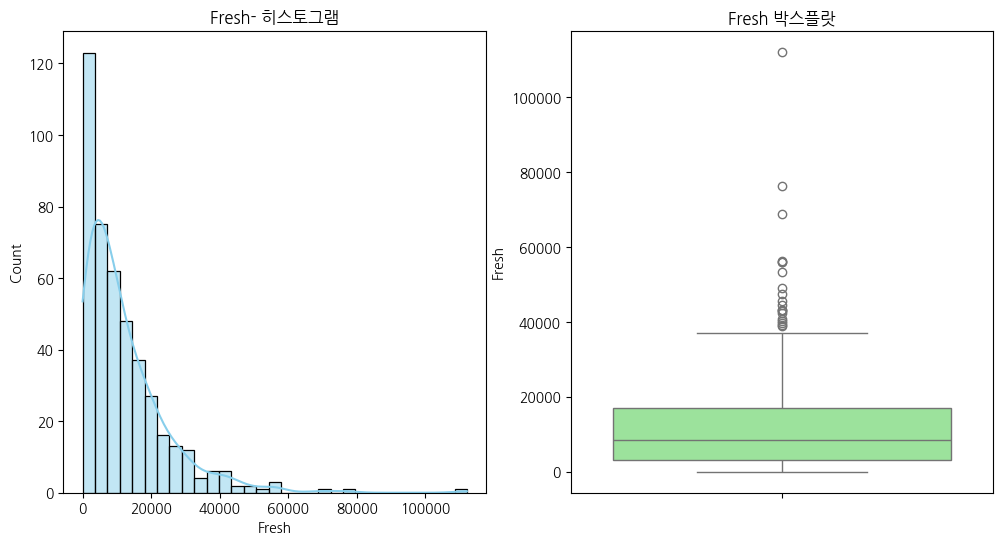

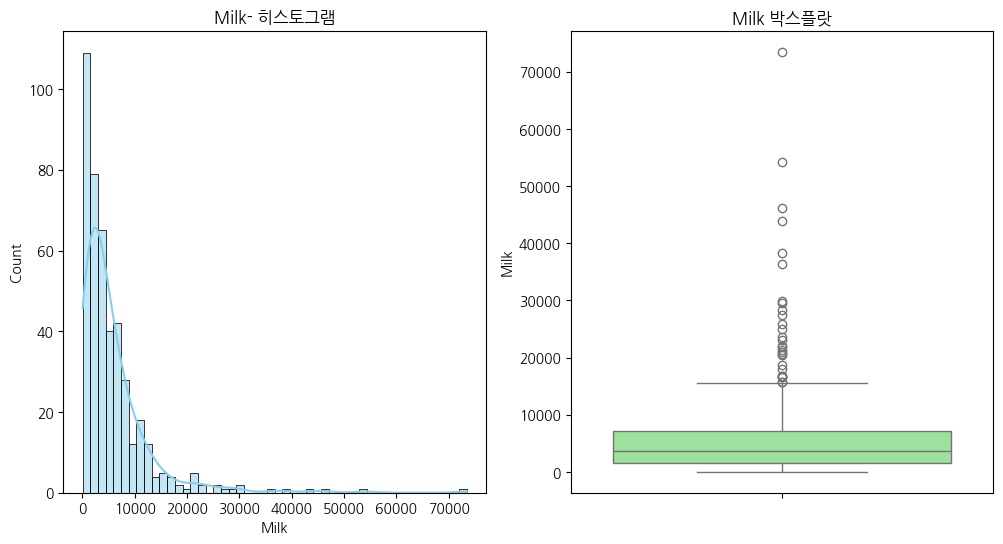

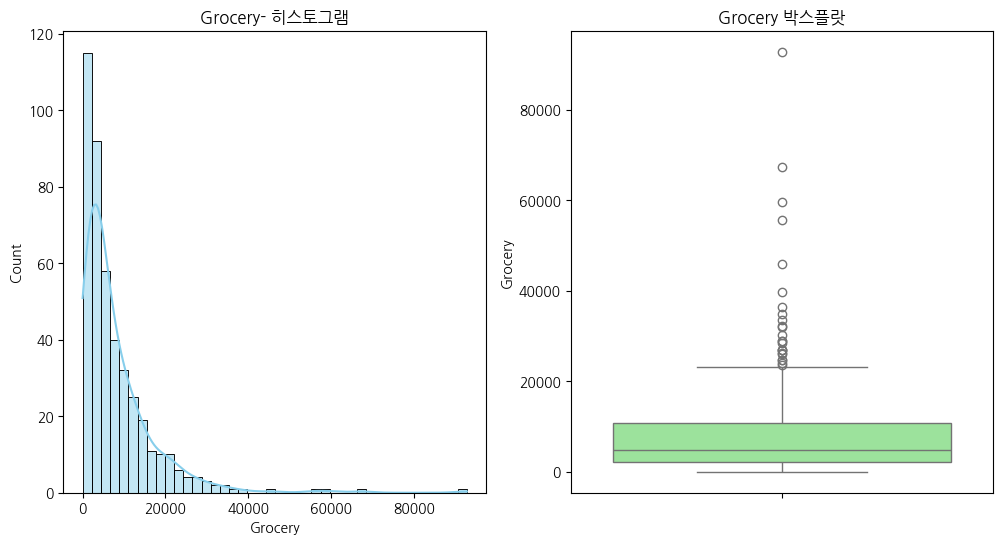

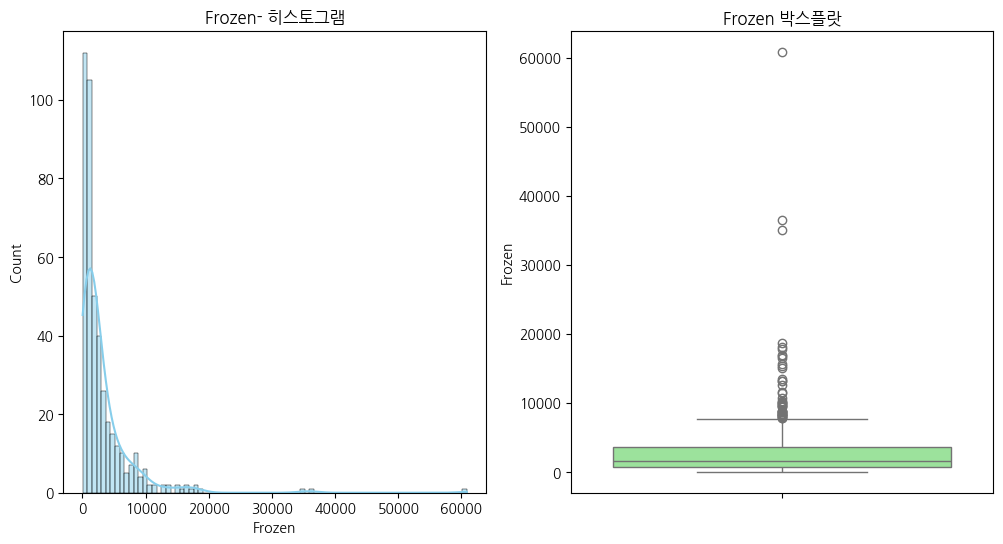

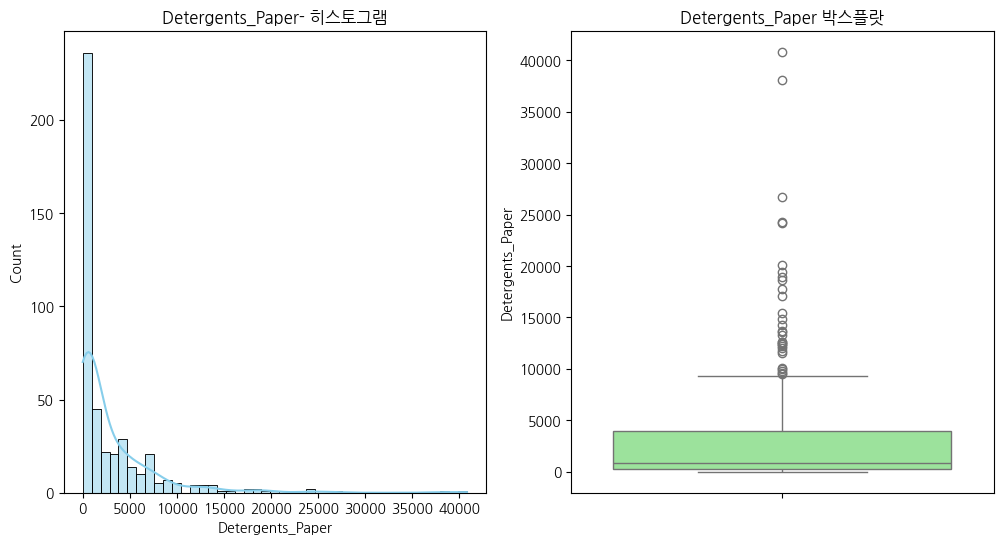

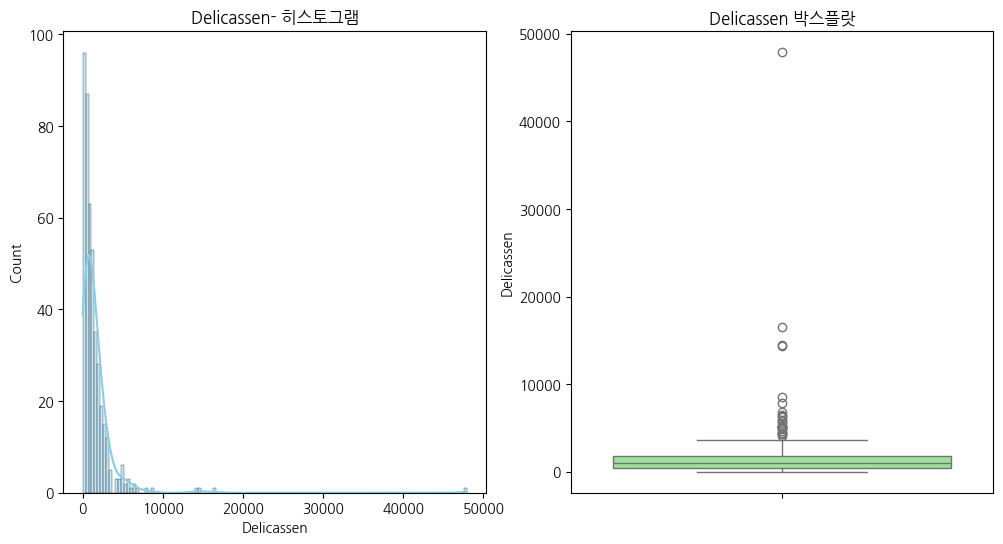

In [6]:
# 이상치 확인 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 분포를 시각화할 각 컬럼을 순회하며 그래프 그리기
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(12, 6))

    # 서브플롯 구성: 히스토그램 + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(encoded_data[col], kde=True, color='skyblue')
    plt.title(f'{col}- 히스토그램')
    plt.xlabel(col)

    # 서브플롯 구성: 박스 플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(y=encoded_data[col], color='lightgreen')
    plt.title(f'{col} 박스플랏')
    
    # 그래프 보여주기
    plt.show()


- 대부분의 그래프가 right-skewed 되어있는 것을 보어 log변환을 해주는 것이 적합하다

In [7]:
# 바로 이상치를 삭제하기 보다는 스케일링을 실행하여 스케일도 맞춰주고 이상치도 줄인다. 
# right-skewed 그래프이기 때문에 log 변환 후 표준화해줌 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 변환할 열 목록
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# 로그변환 
df_log_transformed = encoded_data.copy()
df_log_transformed[columns_to_transform] = np.log1p(encoded_data[columns_to_transform])

# 정규분포에 맞게 스케일링 
scaler = StandardScaler()
df_scaled = df_log_transformed.copy()
df_scaled[columns_to_transform] = scaler.fit_transform(df_log_transformed[columns_to_transform])
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
0,0.486184,0.976299,0.440155,-1.509250,0.644143,0.408966,False,True,True
1,0.087889,0.990956,0.652171,0.134052,0.766043,0.627926,False,True,True
2,0.016356,0.891151,0.454687,0.376899,0.804405,1.776833,False,True,True
3,0.517477,-0.957973,-0.084792,1.141574,-0.328712,0.633133,False,True,False
4,0.880631,0.439662,0.395847,0.757322,0.404939,1.456588,False,True,True


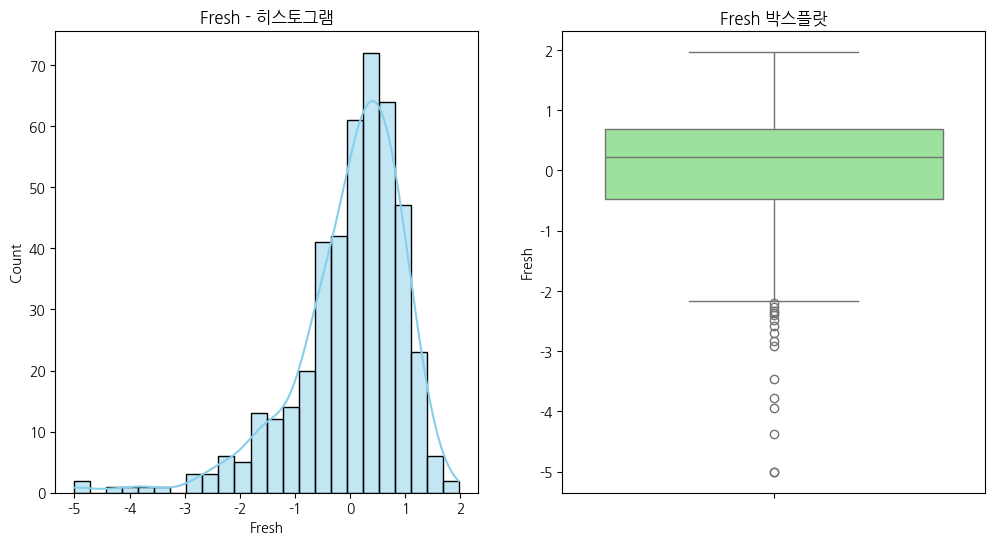

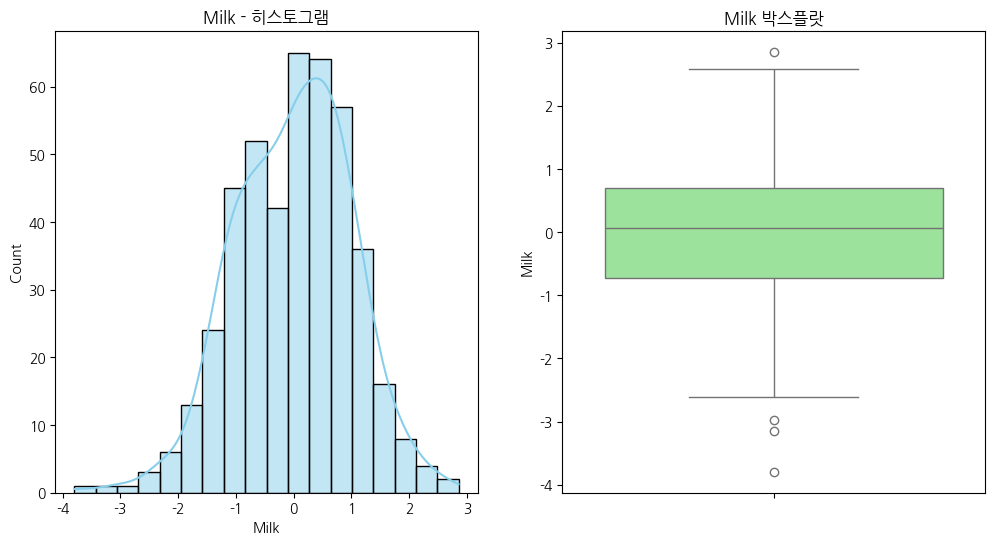

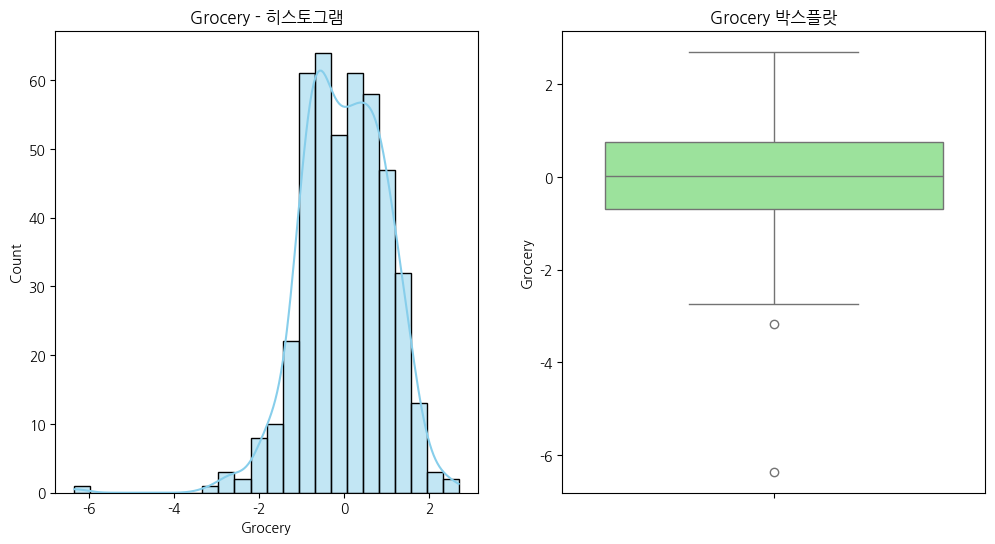

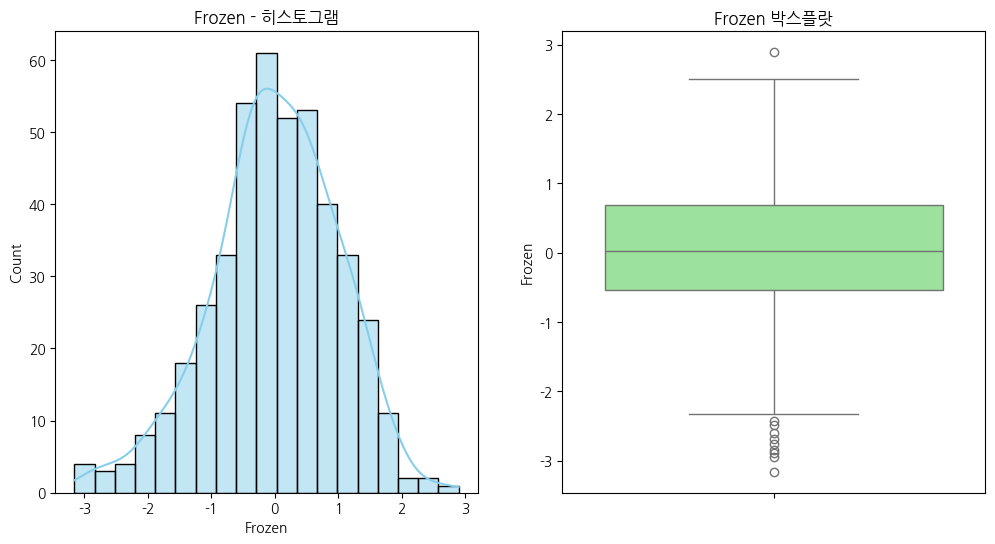

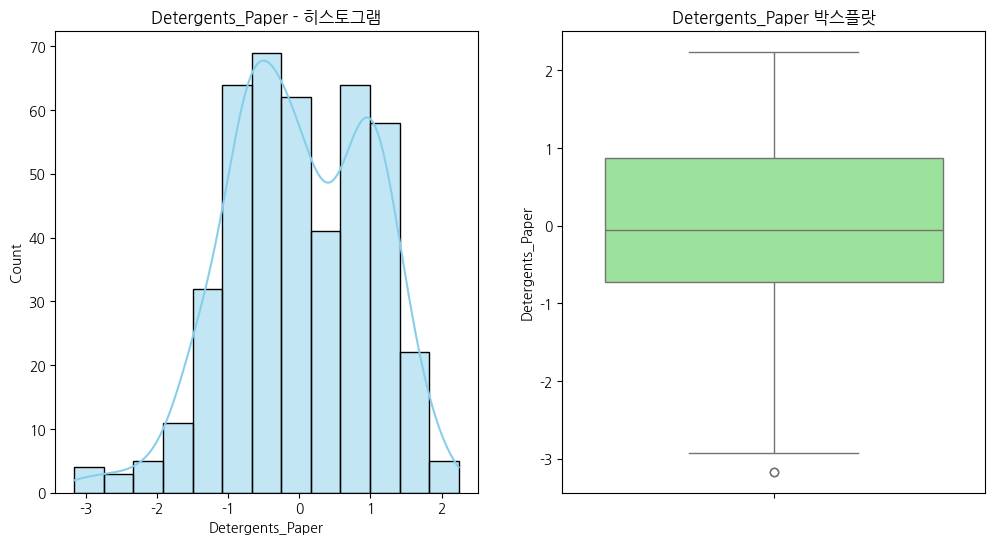

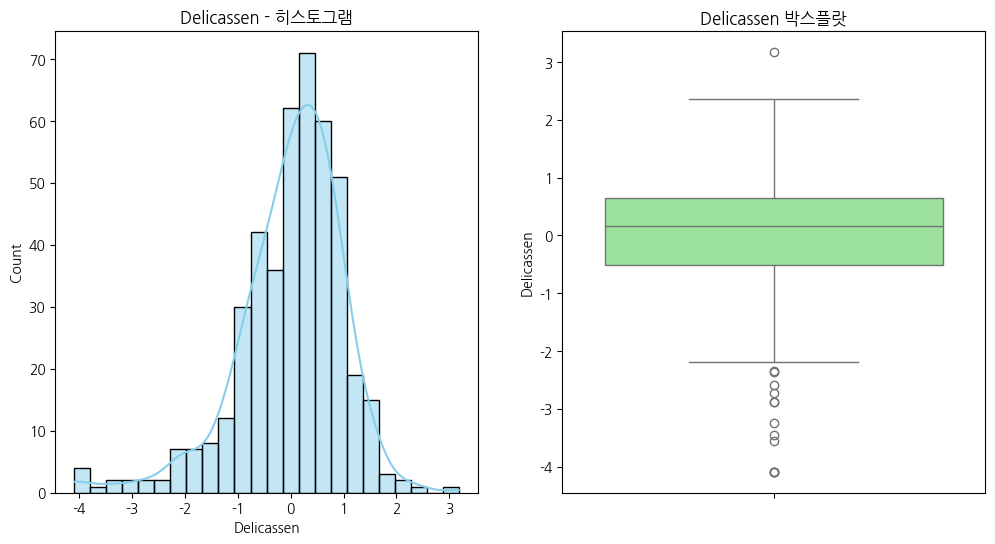

In [9]:
# 이상치 확인 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 수치형만 확인 
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], kde=True, color='skyblue')
    plt.title(f'{col} - 히스토그램')
    plt.xlabel(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_scaled[col], color='lightgreen')
    plt.title(f'{col} 박스플랏')
    plt.show()


In [10]:
# 상관관계 확인 
df_scaled[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()
# df_scaled.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.021096,-0.132989,0.386258,-0.158706,0.256442
Milk,-0.021096,1.000000,0.761128,-0.055229,0.678725,0.342310
Grocery,-0.132989,0.761128,1.000000,-0.164525,0.797141,0.239998
Frozen,0.386258,-0.055229,-0.164525,1.000000,-0.212771,0.256318
Detergents_Paper,-0.158706,0.678725,0.797141,-0.212771,1.000000,0.167573
Delicassen,0.256442,0.342310,0.239998,0.256318,0.167573,1.000000


- milk, grocery, detergents_paper가 상관관계를 보이기 때문에 수치형 변수에 fa를 적용시켜 준다. 
- fa는 관측된 변수들이 몇 개의 잠재 변수에 의해 설명되는지 확인하고, 공통적 요인을 추출하는 데 초점을 맞춘다. 
- PCA(주성분 분석)는 데이터의 분산을 기준으로 주성분을 찾기 때문에, 데이터에 존재하는 노이즈까지 포함한 차원축소를 수행한다. 이는 변수 간 상관관계를 찾아 설명하는 목적보다는 데이터의 분산을 최대한 유지하려는 목적에 가까움. 따라서 PCA는 변수 간 상관관계보다는 데이터의 변동성을 반영하는 데 더 집중함
- Fa로 변수 간의 상관관계를 설명하는 공통 요인을 찾음으로써 차후 클러스터링에 대한 설명이 가능하기 때문에 fa를 활용하였다. 

In [11]:
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3,Channel_2
0,0.486184,0.976299,0.440155,-1.509250,0.644143,0.408966,False,True,True
1,0.087889,0.990956,0.652171,0.134052,0.766043,0.627926,False,True,True
2,0.016356,0.891151,0.454687,0.376899,0.804405,1.776833,False,True,True
3,0.517477,-0.957973,-0.084792,1.141574,-0.328712,0.633133,False,True,False
4,0.880631,0.439662,0.395847,0.757322,0.404939,1.456588,False,True,True


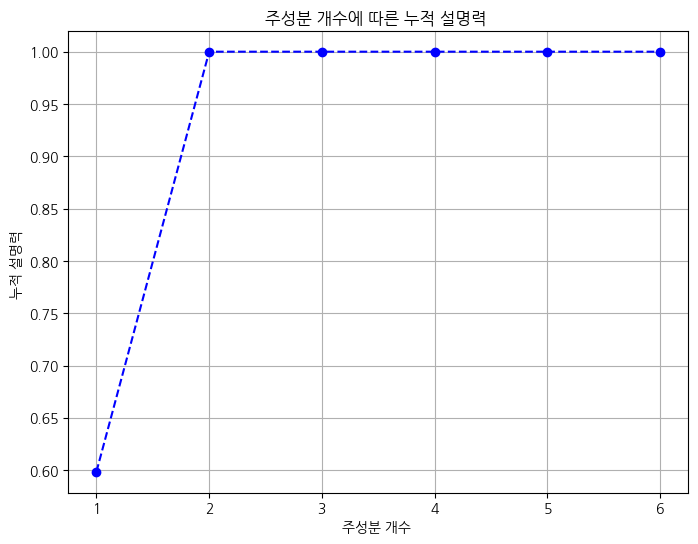

설명력이 90%를 넘는 성분의 개수: 2
최종 데이터의 shape: (440, 5)


In [12]:
# fa를 통해 차원 축소 
from sklearn.decomposition import FactorAnalysis
import numpy as np

# 사용할 수치형 데이터
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

fa = FactorAnalysis()
fa.fit(df_scaled[numerical_columns])
# 각 성분의 설명 분산 비율 
explained_variance = np.var(fa.transform(df_scaled[numerical_columns]), axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
# 누적설명력 
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('주성분 개수에 따른 누적 설명력 ')
plt.xlabel('주성분 개수 ')
plt.ylabel('누적 설명력 ')
plt.grid(True)
plt.show()

# 설명력이 90% 이상이 되는 성분의 개수
n_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"설명력이 90%를 넘는 성분의 개수: {n_components}")
fa = FactorAnalysis(n_components=n_components)
df_fa = fa.fit_transform(df_scaled[numerical_columns])
df_fa = pd.DataFrame(df_fa, columns=[f'FA_{i+1}' for i in range(n_components)])

# 기존의 원핫 인코딩한 데이터와 결합
encoded_data = pd.get_dummies(data, columns=['Region', 'Channel'], drop_first=True)

# 차원 축소된 데이터와 원핫 인코딩된 데이터를 결합
final_data = pd.concat([df_fa, encoded_data.reset_index(drop=True)], axis=1)
final= final_data. drop(columns=numerical_columns)
print(f"최종 데이터의 shape: {final.shape}")

In [14]:
# FA 로딩(loading) 확인
fa_loadings = pd.DataFrame(fa.components_, columns=numerical_columns)
fa_loadings.index = [f'FA_{i+1}' for i in range(n_components)]

# 로딩 값 출력
fa_loadings

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
FA_1,0.134050,-0.822226,-0.928691,0.176824,-0.853617,-0.272635
FA_2,-0.572193,-0.174786,0.013070,-0.596627,0.102858,-0.529792


- 성분 1은 유제품, 식료품, 세제 등과 관련 있기 때문에 일상 소비재, 가정용 필수품으로 해석 가능
- 신선, 냉동 식품, 조제 식품과 관련 있으므로 식료품 소비로 해석 가능 

In [25]:
final.head()

,FA_1,FA_2,Region_2,Region_3,Channel_2
0,-0.663230,0.158619,False,True,True
1,-0.788107,-0.356805,False,True,True
2,-0.704242,-0.755630,False,True,True
3,0.358998,-0.619858,False,True,False
4,-0.433669,-1.039841,False,True,True


### clustering
- kmeans: 클러스터의 중심(centroid)을 계산하여, 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당함-> 이 과정을 반복하여 중심이 바뀌지 않을 때 멈춤 => 연속형 수치형 데이터에 가장 적합 
- 계층적 군집화: 처음에는 각 데이터 포인트를 개별 클러스터로 취급한 후, 가장 가까운 두 클러스터를 반복적으로 병합합니다. 결국 하나의 큰 클러스터가 생성된다. 
- spectral clustering : 그래프 이론을 기반으로 한 군집화 방법입니다. 데이터를 그래프의 노드로 간주하고, 노드 간의 유사성을 기반으로 군집을 형성, 연결 강도에 따라 데이터 그룹을 나눈다. 
-> 일반적으로, 범주형 데이터와 수치형 데이터 혼합으로 구성된 데이터에 적합함 

<img src="clustering.png" alt="nn" width="600"/>
![nn](shot.png)

-  각 데이터의 점들과 다른 점 사이에 선을 긋고 두 데이터의 유사도에 따라 가중치 부여
- 두 데이터 간의 유사점이 많으면 큰 가중치, 낮으면 작은 가중치를 두어 이를 기준으로 두 그룹으로 분류

In [26]:
# ! pip install kmodes gower


n_clusters = 2 | KMeans Silhouette: 0.36568054603309325 | Agglomerative Silhouette: 0.36431502492984097 | Spectral Silhouette: 0.35126954013772016
n_clusters = 3 | KMeans Silhouette: 0.26586596977802474 | Agglomerative Silhouette: 0.27436825538974857 | Spectral Silhouette: 0.30247287901349607
n_clusters = 4 | KMeans Silhouette: 0.2748774326595875 | Agglomerative Silhouette: 0.2693274396897538 | Spectral Silhouette: 0.22531522353219097
n_clusters = 5 | KMeans Silhouette: 0.3019120627910406 | Agglomerative Silhouette: 0.27735896747212985 | Spectral Silhouette: 0.2500002049133889
n_clusters = 6 | KMeans Silhouette: 0.3155396980269218 | Agglomerative Silhouette: 0.3076395894878617 | Spectral Silhouette: 0.27139067119441224
n_clusters = 7 | KMeans Silhouette: 0.2769276215286535 | Agglomerative Silhouette: 0.3319472909837645 | Spectral Silhouette: 0.303352062969558
n_clusters = 8 | KMeans Silhouette: 0.2977316057668462 | Agglomerative Silhouette: 0.2814472123571679 | Spectral Silhouette: 0.2

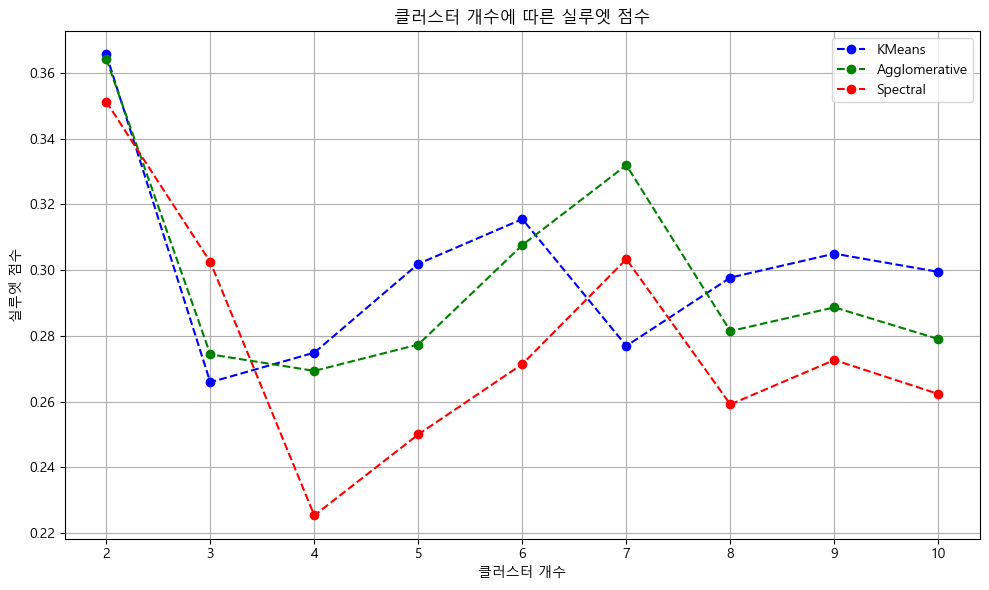

In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# 사용할 열만 추출
df_clustering = final  # 데이터셋
silhouette_scores = {
    'KMeans': [],
    'Agglomerative': [],
    'Spectral': []
}

n_clusters_list = range(2, 11)  # 군집 수를 2부터 10까지 변경

for n_clusters in n_clusters_list:
    # 각 클러스터링 알고리즘 정의
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    
    # 클러스터링 결과 생성 및 실루엣 점수 계산
    kmeans_labels = kmeans.fit_predict(df_clustering)
    silhouette_scores['KMeans'].append(silhouette_score(df_clustering, kmeans_labels))
    
    agg_labels = agg_clustering.fit_predict(df_clustering)
    silhouette_scores['Agglomerative'].append(silhouette_score(df_clustering, agg_labels))
    
    spectral_labels = spectral_clustering.fit_predict(df_clustering)
    silhouette_scores['Spectral'].append(silhouette_score(df_clustering, spectral_labels))
    
    print(f"n_clusters = {n_clusters} | KMeans Silhouette: {silhouette_scores['KMeans'][-1]} | "
          f"Agglomerative Silhouette: {silhouette_scores['Agglomerative'][-1]} | "
          f"Spectral Silhouette: {silhouette_scores['Spectral'][-1]}")

# 실루엣 점수 시각화
plt.figure(figsize=(10, 6))

# KMeans 실루엣 점수
plt.plot(n_clusters_list, silhouette_scores['KMeans'], marker='o', linestyle='--', color='b', label='KMeans')
# Agglomerative 실루엣 점수
plt.plot(n_clusters_list, silhouette_scores['Agglomerative'], marker='o', linestyle='--', color='g', label='Agglomerative')
# Spectral 실루엣 점수
plt.plot(n_clusters_list, silhouette_scores['Spectral'], marker='o', linestyle='--', color='r', label='Spectral')

plt.title('클러스터 개수에 따른 실루엣 점수')
plt.xlabel('클러스터 개수')
plt.ylabel('실루엣 점수')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


- 2,6,7일 때 실루엣 점수 높게 나옴

### 시각화
- 2차원으로 시각화해서 직관적으로 이해할 수 있도록 해야한다
- pca: 분산이 큰 방향으로 데이터를 축소함, 차원1, 차원2 ,,, 낮을수록 더 많은 설명을하고 있기 때문에 시각화할 때 2차원으로 보여주기 아주 적합함
- tsne: t-SNE는 데이터의 비선형 관계를 반영하여, 유사한 데이터 포인트가 가까이 배치되도록 시각화하는 기법으로 feature가 많을경우 비선형인 경우가 많기 때문에 적합함 
- umap: t-SNE와 유사하게 비선형 구조를 반영하면서도, 더 빠르게 계산할 수 있습니다. 데이터의 국소적 및 전역적 구조를 모두 유지하는 데 집중하는 기법
- =>> 세가지 방법을 사용해서 시각화한다

### 2개 군집

c:\Users\minye\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


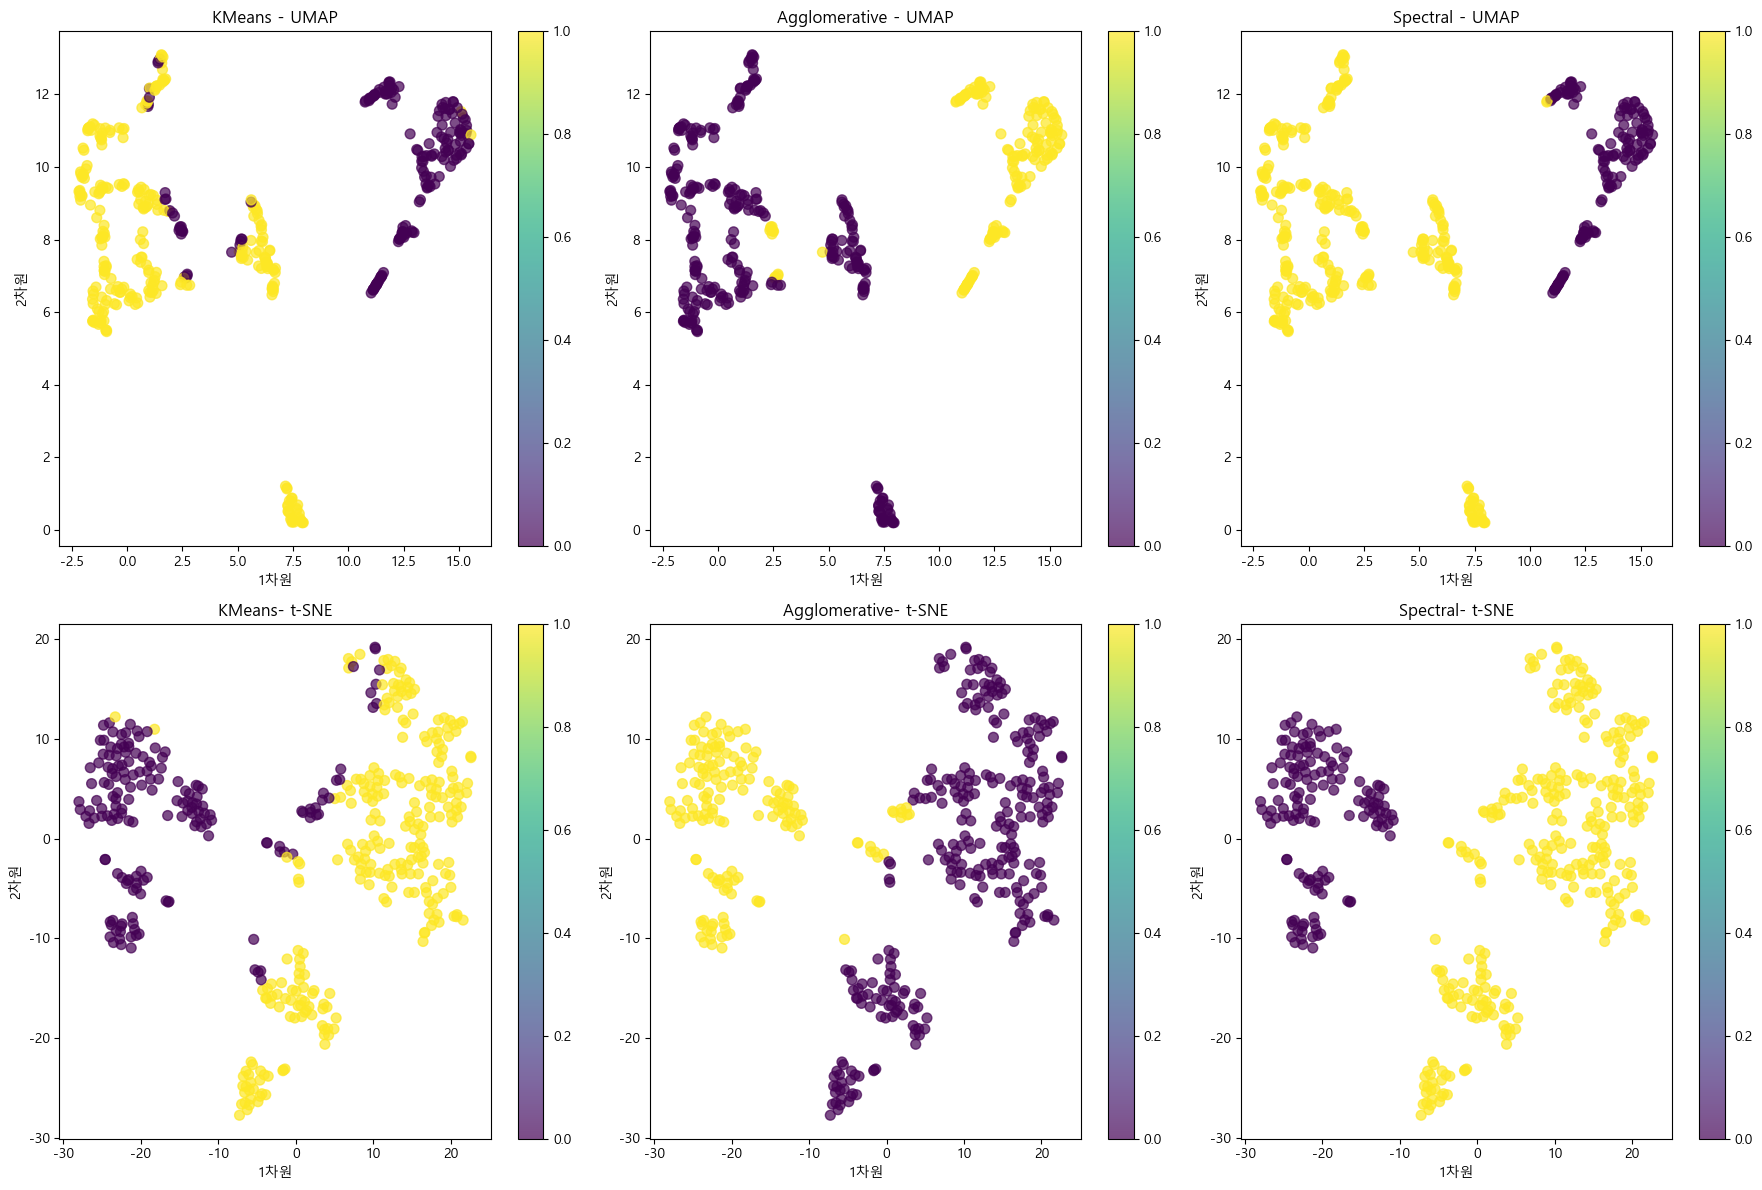

In [36]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

# 클러스터링 설정
n_clusters_kmeans = 2
n_clusters_agg_spectral = 2

# KMeans 클러스터링
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustering)
# Agglomerative 클러스터링
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg_spectral)
agg_labels = agg_clustering.fit_predict(df_clustering)
# Spectral 클러스터링 
spectral_clustering = SpectralClustering(n_clusters=n_clusters_agg_spectral, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_clustering.fit_predict(df_clustering)

# 차원 축소: UMAP, TSNE
reducer_umap = umap.UMAP(random_state=42)
embedding_umap = reducer_umap.fit_transform(df_clustering)
reducer_tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = reducer_tsne.fit_transform(df_clustering)

# 차원 축소: PCA
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(df_clustering)

# 시각화 함수 정의
def plot_clusters(embedding, labels, title, ax):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('1차원')
    ax.set_ylabel('2차원')
    plt.colorbar(scatter, ax=ax)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# UMAP
plot_clusters(embedding_umap, kmeans_labels, 'KMeans - UMAP', axes[0, 0])
plot_clusters(embedding_umap, agg_labels, 'Agglomerative - UMAP', axes[0, 1])
plot_clusters(embedding_umap, spectral_labels, 'Spectral - UMAP', axes[0, 2])
# t-SNE
plot_clusters(embedding_tsne, kmeans_labels, 'KMeans- t-SNE', axes[1, 0])
plot_clusters(embedding_tsne, agg_labels, 'Agglomerative- t-SNE', axes[1, 1])
plot_clusters(embedding_tsne, spectral_labels, 'Spectral- t-SNE', axes[1, 2])
plt.tight_layout()
plt.show()


### 6,7개 군집


c:\Users\minye\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


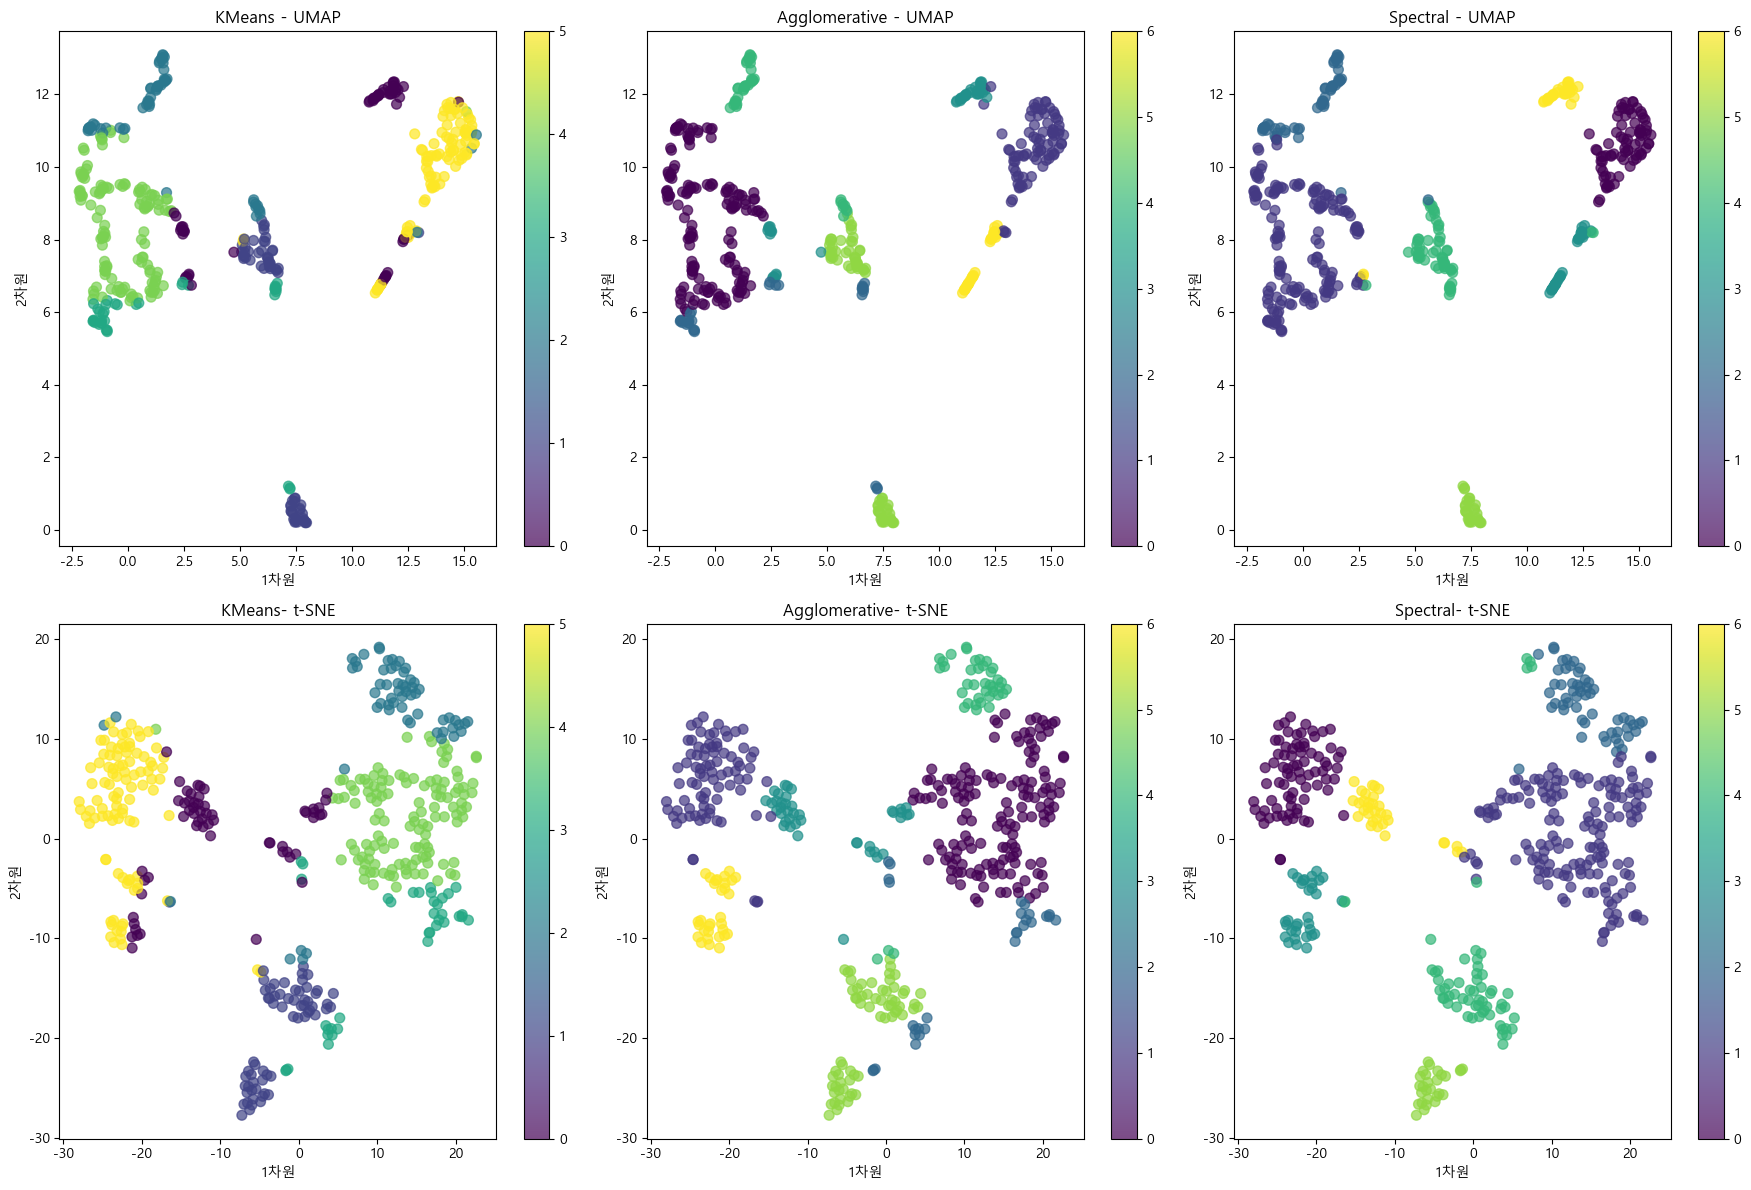

In [37]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

# 클러스터링 설정
n_clusters_kmeans = 6
n_clusters_agg_spectral = 7

# KMeans 클러스터링
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustering)
# Agglomerative 클러스터링
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg_spectral)
agg_labels = agg_clustering.fit_predict(df_clustering)
# Spectral 클러스터링 
spectral_clustering = SpectralClustering(n_clusters=n_clusters_agg_spectral, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral_clustering.fit_predict(df_clustering)

# 차원 축소: UMAP, TSNE
reducer_umap = umap.UMAP(random_state=42)
embedding_umap = reducer_umap.fit_transform(df_clustering)
reducer_tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = reducer_tsne.fit_transform(df_clustering)

# 차원 축소: PCA
pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(df_clustering)

# 시각화 함수 정의
def plot_clusters(embedding, labels, title, ax):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('1차원')
    ax.set_ylabel('2차원')
    plt.colorbar(scatter, ax=ax)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# UMAP
plot_clusters(embedding_umap, kmeans_labels, 'KMeans - UMAP', axes[0, 0])
plot_clusters(embedding_umap, agg_labels, 'Agglomerative - UMAP', axes[0, 1])
plot_clusters(embedding_umap, spectral_labels, 'Spectral - UMAP', axes[0, 2])
# t-SNE
plot_clusters(embedding_tsne, kmeans_labels, 'KMeans- t-SNE', axes[1, 0])
plot_clusters(embedding_tsne, agg_labels, 'Agglomerative- t-SNE', axes[1, 1])
plot_clusters(embedding_tsne, spectral_labels, 'Spectral- t-SNE', axes[1, 2])
plt.tight_layout()
plt.show()


#### spectral로 2,7로 클러스터링 했을 때 가장 잘 군집화 된다.

c:\Users\minye\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


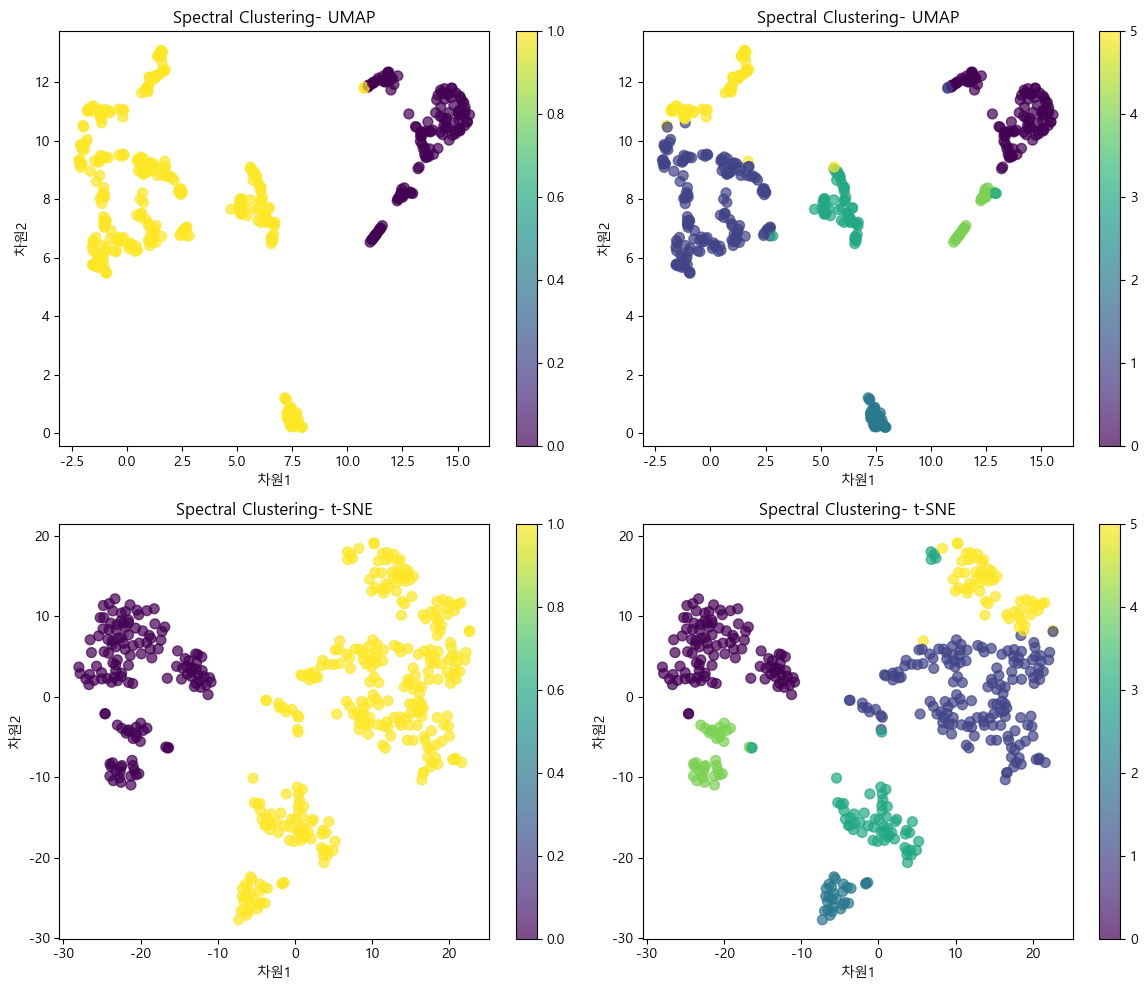

In [38]:
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# 클러스터링 설정
n_clusters_2 = 2
n_clusters_6 = 6

# Spectral Clustering (2개 클러스터)
spectral_clustering_2 = SpectralClustering(n_clusters=n_clusters_2, affinity='nearest_neighbors', random_state=42)
spectral_labels_2 = spectral_clustering_2.fit_predict(df_clustering)

# Spectral Clustering (6개 클러스터)
spectral_clustering_6 = SpectralClustering(n_clusters=n_clusters_6, affinity='nearest_neighbors', random_state=42)
spectral_labels_6 = spectral_clustering_6.fit_predict(df_clustering)

# 차원 축소: UMAP
reducer_umap = umap.UMAP(random_state=42)
embedding_umap = reducer_umap.fit_transform(df_clustering)

# 차원 축소: t-SNE
reducer_tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = reducer_tsne.fit_transform(df_clustering)

# 시각화 함수 정의
def plot_clusters(embedding, labels, title, ax):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('차원1')
    ax.set_ylabel('차원2')
    plt.colorbar(scatter, ax=ax)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# UMAP 시각화
plot_clusters(embedding_umap, spectral_labels_2, 'Spectral Clustering- UMAP', axes[0, 0])
plot_clusters(embedding_umap, spectral_labels_6, 'Spectral Clustering- UMAP', axes[0, 1])

# t-SNE 시각화
plot_clusters(embedding_tsne, spectral_labels_2, 'Spectral Clustering- t-SNE', axes[1, 0])
plot_clusters(embedding_tsne, spectral_labels_6, 'Spectral Clustering- t-SNE', axes[1, 1])

plt.tight_layout()
plt.show()


### 결론
- 실루엣 점수가 군집이 얼마나 잘 분리되었는지 보여주는 데 좋은 지표인 것은 확실하다. 
- 군집화된 결과를 직접 산점도로 확인하는 것이 가장 직관적으로 판단하는 데 있어서 좋다. 
- 데이터의 특징에 따라 사용해야 할 클러스터링 모델이 다르다.
- 범주형 변수와 수치형 변수가 함께 있기 때문에 spectral 군집 방법이 가장 좋은 성능을 보이는 것 같다. 

###